In [1]:
# adaboosting; randomforest
# feature engineering
# most_frequent replace nan
# cross validation
# dummies
# pca 待定

In [72]:
# import packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sklearn as sl
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
#from scipy.stats import pearsonr
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from pandas import DataFrame
from sklearn import ensemble

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# import tensorflow as tf
# import numpy as np
# import os

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
%matplotlib inline

read csv by row and col

In [75]:
origin_col = pd.read_csv("train.csv") 

test_origin = pd.read_csv("test.csv")

In [76]:
train_col = origin_col.drop(['id'], axis = 1)
test_col = test_origin.drop(['id'], axis = 1)
train_label = origin_col['time']
train_col = train_col.drop(['time'], axis = 1)

In [77]:
test_col

,penalty,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale
0,l2,0.690384,0.0010,602,890,4,1376,1078,3,4,8,0.049072,40.832757
1,elasticnet,0.215088,0.0010,522,357,4,598,1528,10,3,11,0.041393,68.611537
2,l2,0.217458,0.0010,398,105,16,553,1008,8,5,8,0.005987,61.713892
3,none,0.120303,0.0010,439,586,16,1977,1319,3,4,10,0.002964,58.631194
4,none,0.458851,0.0100,278,246,4,1826,1530,7,5,8,0.050126,87.315374
5,l1,0.580799,0.0100,886,703,4,557,1647,5,4,8,0.070937,78.830594
6,none,0.893885,0.0010,983,241,2,300,1744,7,5,11,0.074611,40.178590
7,none,0.625540,0.0001,634,835,8,410,826,9,5,10,0.062585,30.479567
8,elasticnet,0.574535,0.0001,958,693,2,516,1433,5,2,8,0.050387,67.032764
9,none,0.855400,0.0010,199,156,1,1609,248,3,4,8,0.081393,54.261524


In [78]:
for f in train_col.columns:
    if train_col[f].dtype == 'object':
        le = LabelEncoder()
        le_fit = le.fit(train_col[f])
        train_col[f] = le_fit.transform(train_col[f])
        test_col[f] = le_fit.transform(test_col[f])

In [79]:
train_col

,penalty,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale
0,3,0.304083,0.0001,417,475,-1,1089,327,4,3,7,0.074798,24.242009
1,1,0.727744,0.0010,578,569,1,790,373,4,5,7,0.077781,54.626302
2,3,0.745885,0.0100,588,529,2,428,1198,2,5,6,0.030196,17.999964
3,3,0.474605,0.0010,829,103,4,877,313,6,5,7,0.057261,82.257222
4,0,0.395049,0.0010,167,418,2,216,644,8,5,11,0.073728,95.515601
5,1,0.358837,0.0010,986,94,4,1396,861,4,2,6,0.097483,31.973447
6,3,0.758565,0.0001,929,532,2,908,691,5,2,6,0.095324,98.238367
7,1,0.282841,0.0001,422,143,8,677,737,9,5,8,0.040463,54.628206
8,1,0.766176,0.0100,308,85,8,498,1191,2,4,9,0.025639,54.166346
9,2,0.249018,0.0010,510,574,8,1380,803,9,5,10,0.024620,75.048054


In [9]:
test_col

,penalty,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale
0,2,0.690384,0.0010,602,890,4,1376,1078,3,4,8,0.049072,40.832757
1,0,0.215088,0.0010,522,357,4,598,1528,10,3,11,0.041393,68.611537
2,2,0.217458,0.0010,398,105,16,553,1008,8,5,8,0.005987,61.713892
3,3,0.120303,0.0010,439,586,16,1977,1319,3,4,10,0.002964,58.631194
4,3,0.458851,0.0100,278,246,4,1826,1530,7,5,8,0.050126,87.315374
5,1,0.580799,0.0100,886,703,4,557,1647,5,4,8,0.070937,78.830594
6,3,0.893885,0.0010,983,241,2,300,1744,7,5,11,0.074611,40.178590
7,3,0.625540,0.0001,634,835,8,410,826,9,5,10,0.062585,30.479567
8,0,0.574535,0.0001,958,693,2,516,1433,5,2,8,0.050387,67.032764
9,3,0.855400,0.0010,199,156,1,1609,248,3,4,8,0.081393,54.261524


In [80]:
# train_col = train_col.drop(['flip_y'], axis = 1)
# test_col = test_col.drop(['flip_y'], axis = 1)
train_col = train_col.drop(['random_state'], axis = 1)
test_col = test_col.drop(['random_state'], axis = 1)

In [11]:
# read by row
# with open('data/trainFeatures.csv', 'r') as csvfile:
#     reader = csv.reader(csvfile)
#     rows = [row for row in reader]

# origin_row = rows[1:]
#print(rows)
#origin_row[0]

Data preprocessing

In [81]:
x_array = np.array(train_col)# convert to array

y_array = np.array(train_label)

test_array = np.array(test_col)

In [82]:
# x_array = np.delete(x_array, 3, 1) #delete attribute education (duplicate with atrribute edu_num)
# test_array = np.delete(test_array, 3, 1)

In [83]:
x_array[0][5]

1089.0

In [84]:
min_max_scaler = MinMaxScaler()

In [85]:
x_minmax_fit = min_max_scaler.fit(x_array)
x_array = x_minmax_fit.transform(x_array)

test_array = x_minmax_fit.transform(test_array)

In [346]:
# for i in range(len(x_array)):
#     if x_array[i][5] == -1:
#         x_array[i][5] = 32
# for j in range(len(test_array)):
#     if test_array[j][5] == -1:
#         test_array[j][5] =32
# print(x_array[:,5])
# print(test_array[:,5])

In [16]:
# s=[]
# for i in x_array[:,2]:
#     if i not in s:
#         s.append(i)
# print(len(s))
# print(s) result: 3 ; [0.0001,0.001, 0.01]

# we can consider convert alpha to 1,2,3


In [63]:
# # convert categorical attributes to numerical attributes
# le = LabelEncoder()
# #le1 = LabelEncoder()
# le_fit = le.fit(x_array[:,0])
# #le_fit1 = le1.fit(test_array[:,5])
# x_array[:,0] = le_fit.transform(x_array[:,0])
# #x_array[:,5] = le_fit1.transform(x_array[:,5])
# test_array[:,0] = le_fit.transform(test_array[:,0])
# #test_array[:,5] = le_fit1.transform(test_array[:,5])

# for i in [0,8,9,10]:
#     le = LabelEncoder()
#     le_fit = le.fit(x_array[:,i])
#     x_array[:,i] = le_fit.transform(x_array[:,i])
#     test_array[:,i] = le_fit.transform(test_array[:,i])



In [54]:
x_array[:5]

array([[1.        , 0.25630401, 0.        , 0.35083799, 0.475     ,
        0.        , 0.76252891, 0.16860917, 0.25      , 0.33333333,
        0.28571429, 0.74886274, 0.23125834],
       [0.33333333, 0.78930269, 0.09090909, 0.53072626, 0.569     ,
        0.22222222, 0.53199692, 0.2043512 , 0.25      , 1.        ,
        0.28571429, 0.7787458 , 0.54060514],
       [1.        , 0.81212576, 1.        , 0.54189944, 0.529     ,
        0.33333333, 0.25289129, 0.84537685, 0.        , 1.        ,
        0.14285714, 0.30204038, 0.1677072 ],
       [1.        , 0.47083431, 0.09090909, 0.81117318, 0.103     ,
        0.55555556, 0.59907479, 0.15773116, 0.5       , 1.        ,
        0.28571429, 0.57317773, 0.82191946],
       [0.        , 0.37074721, 0.09090909, 0.07150838, 0.418     ,
        0.33333333, 0.08943716, 0.41491841, 0.75      , 1.        ,
        0.85714286, 0.73814093, 0.95690489]])

In [320]:
s = []
c = 8
for i in range(len(x_array)):
    if x_array[i][c] not in s:
        s.append(x_array[i][c])
s.sort()
print(s)

s1 = []
for i in range(len(test_array)):
    if test_array[i][c] not in s1:
        s1.append(test_array[i][c])
s1.sort()
print(s1)


[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [41]:
print(x_array[:,0])
print(test_array[:,0])

[3 1 3 3 0 1 3 1 1 2 3 2 0 2 2 3 3 0 0 0 3 0 3 3 1 3 0 2 3 3 2 2 2 1 3 0 3
 3 1 3 1 0 2 3 2 2 0 0 0 3 1 0 1 0 0 1 0 2 3 3 3 3 1 1 3 1 3 2 2 2 3 2 1 2
 2 1 0 3 1 2 2 0 0 0 1 3 0 3 0 0 3 3 1 2 0 3 1 0 2 0 1 3 0 2 2 2 2 3 2 2 3
 2 3 1 0 0 3 0 3 0 1 0 1 2 0 0 0 0 3 1 2 1 2 0 2 1 0 0 0 2 0 0 1 1 2 1 3 1
 3 3 2 0 0 2 3 3 1 2 3 1 3 0 1 3 3 1 1 3 0 1 0 3 2 0 2 3 1 1 0 0 0 0 3 1 2
 0 0 0 1 1 2 3 0 1 3 2 1 3 0 3 0 3 3 0 1 0 2 3 2 3 2 3 3 1 1 1 1 0 3 0 1 1
 2 2 0 1 3 3 0 2 1 0 0 0 2 1 2 3 0 3 3 0 3 2 0 0 1 3 1 1 0 3 0 0 0 0 3 1 1
 2 0 1 3 3 2 2 1 1 2 3 3 2 3 0 0 2 0 3 2 3 0 2 2 3 0 0 3 2 1 0 2 0 0 2 1 0
 3 1 0 3 0 1 2 0 2 0 1 2 3 0 3 3 1 2 3 2 0 1 3 0 1 2 1 2 1 2 0 3 3 2 1 3 1
 0 0 1 1 2 2 3 0 0 2 3 1 3 0 1 1 1 1 0 1 1 0 3 0 0 0 1 2 1 2 3 3 2 1 2 3 0
 2 1 0 0 1 2 1 3 0 2 1 1 2 1 2 3 3 1 2 1 2 1 3 0 0 3 1 3 2 2]
[2 0 2 3 3 1 3 3 0 3 2 0 2 0 0 2 0 3 0 1 3 3 2 1 2 2 0 1 0 2 0 1 3 1 0 1 0
 1 2 3 1 1 0 2 2 1 0 2 2 2 3 1 3 0 3 3 0 2 1 0 2 0 2 0 0 1 0 3 0 2 3 2 1 2
 1 2 3 2 0 2 0 3 2 1 1 3 1 3 0 3 0 2 3

In [42]:
test_array

array([[2, 0.6903840136723245, 0.001, ..., 3, 0.04907234088389045,
        40.83275716253707],
       [0, 0.2150878832512123, 0.001, ..., 6, 0.04139334223514865,
        68.61153683930036],
       [2, 0.21745822662950715, 0.001, ..., 3, 0.0059867164356933724,
        61.71389197178802],
       ...,
       [2, 0.6871744721962043, 0.0001, ..., 1, 0.044531226906221945,
        50.28956837425084],
       [3, 0.6314030966103252, 0.0001, ..., 3, 0.0030453539639199727,
        68.05728550738452],
       [2, 0.6418181593022373, 0.01, ..., 5, 0.09952511751601666,
        36.02745715498196]], dtype=object)

In [43]:
l = []
for i in range(len(x_array)):
    if x_array[i][5] not in l:
        l.append(x_array[i][5])
print(l)

l1 = []
for i in range(len(test_array)):
    if test_array[i][5] not in l1:
        l1.append(test_array[i][5])
print(l1)

[-1, 1, 2, 4, 8]
[4, 16, 2, 8, 1, -1]


In [8]:
print(len(x_array[0]))

13


In [20]:
# print(x_array[0])
# print(test_array[0])

In [21]:
#convert 0 to nan
# x_array[:,1][x_array[:,1] == 0] = np.nan
# x_array[:,5][x_array[:,5] == 0] = np.nan
# x_array[:,12][x_array[:,12] == 0] = np.nan

# test_array[:,1][test_array[:,1] == 0] = np.nan
# test_array[:,5][test_array[:,5] == 0] = np.nan
# test_array[:,12][test_array[:,12] == 0] = np.nan

In [22]:
# fill in missing values with mode
# imr = Imputer(strategy = 'most_frequent')
# x_imr_fit = imr.fit(x_array)
# x_array = x_imr_fit.transform(x_array)
# test_array = x_imr_fit.transform(test_array)
# print(x_array[10][1])
# print(test_array[6][1])

In [23]:
#isinstance(x_array[0][3],float)

In [24]:
# We only care about whether the person have capital-gain 
# and whether the person have capital-loss
# So binarizer feature 'capital-gain' and 'capital-loss'

# x_array[:,9][x_array[:,9] > 0] = 1
# x_array[:,10][x_array[:,10] > 0] = 1

# test_array[:,9][test_array[:,9] > 0] = 1
# test_array[:,10][test_array[:,10] > 0] = 1
# print(len(x_array[0]))
# print(len(test_array[0]))

In [10]:

# # 分别列出需要标准化和不需要标准化的数据
# # continuous features
# x_cont = x_array[:,[1,2,3,4,6,7,11,12]]
# x_cont_df = DataFrame(x_cont)

# test_cont = test_array[:,[1,2,3,4,6,7,11,12]]
# test_cont_df = DataFrame(test_cont)
# # convert skew>0.5 to nomalized distribution

# # skewness = x_cont_df.apply(lambda x:DataFrame.skew(x))
# # skewness = skewness[abs(skewness) > 0.5]
# # skewed_features = skewness.index
# # #print(skewness.index) [0,1]
# # x_cont_df[skewed_features] = np.log1p(x_cont_df[skewed_features])
# # x_cont = np.array(x_cont_df)

# # test_cont_df[skewed_features] = np.log1p(test_cont_df[skewed_features])
# # test_cont = np.array(test_cont_df)
# # 标准化
# min_max_scaler = MinMaxScaler()

# #要改
# x_minmax_fit = min_max_scaler.fit(x_cont)
# x_minmax = x_minmax_fit.transform(x_cont)

# test_minmax = x_minmax_fit.transform(test_cont)
# #x_minmax
# # x_cont_var = x_cont.var(axis = 0)
# # x_cont_var
# x_cont = x_minmax

# test_cont = test_minmax

# # print(len(x_train[0]))
# # print(len(test_cont[0]))

/Users/littletyrant/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
print(x_cont[:5])
print(test_cont[:5])

[[0.25630401 0.         0.35083799 0.475      0.76252891 0.16860917
  0.74886274 0.23125834]
 [0.78930269 0.09090909 0.53072626 0.569      0.53199692 0.2043512
  0.7787458  0.54060514]
 [0.81212576 1.         0.54189944 0.529      0.25289129 0.84537685
  0.30204038 0.1677072 ]
 [0.47083431 0.09090909 0.81117318 0.103      0.59907479 0.15773116
  0.57317773 0.82191946]
 [0.37074721 0.09090909 0.07150838 0.418      0.08943716 0.41491841
  0.73814093 0.95690489]]
[[0.74230074 0.09090909 0.5575419  0.89       0.98380879 0.75213675
  0.49114217 0.4001711 ]
 [0.14434179 0.09090909 0.46815642 0.357      0.38396299 1.1017871
  0.41421353 0.6829908 ]
 [0.14732386 0.09090909 0.32960894 0.105      0.34926754 0.6977467
  0.059508   0.6127649 ]
 [0.02509486 0.09090909 0.37541899 0.586      1.44718581 0.93939394
  0.02922133 0.58137951]
 [0.45101461 1.         0.19553073 0.246      1.3307633  1.1033411
  0.50169889 0.87341722]]


In [12]:
# # discrete features
# x_disc = x_array[:,[0,5,8,9,10]]

# test_disc = test_array[:,[0,5,8,9,10]]
# # compute their variance

# #x_disc_var = x_disc.var(axis = 0)


# #remove variance < 3, those have small impact on target
# #print(x_disc_var)

# #x_disc_features = np.argwhere(x_disc_var < 2).reshape(1,-1)

# #print(x_disc_features) [[0 4 5 6 7]]

# #x_disc = np.delete(x_disc, x_disc_features, axis = 1)

# x_disc_df = DataFrame(x_disc)

# test_disc_df = DataFrame(test_disc)
# # x_disc

# # get dummies
# x_objs_num = len(x_disc_df)
# for i in range(len(x_disc[0])):
    
#     dataset = pd.concat(objs = [x_disc_df[i],test_disc_df[i]], axis = 0)
#     dataset = pd.get_dummies(dataset)
#     temp_x = np.array(copy.copy(dataset[:x_objs_num]))
#     temp_test = np.array(copy.copy(dataset[x_objs_num:]))
    
    
#     x_cont = np.column_stack((x_cont, temp_x))
#     test_cont = np.column_stack((test_cont, temp_test))
# # x_train = np.column_stack((x_train, x_disc_df[1]))
# # test_cont = np.column_stack((test_cont, test_disc_df[1]))
# x_array = x_cont
# test_array = test_cont
# print(x_array[0])
# print(test_array[0])

[0.25630401 0.         0.35083799 0.475      0.76252891 0.16860917
 0.74886274 0.23125834 0.         0.         0.         1.
 1.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.        ]
[0.74230074 0.09090909 0.5575419  0.89       0.98380879 0.75213675
 0.49114217 0.4001711  0.         0.         1.         0.
 0.         0.         0.         1.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.        ]


In [14]:
# print(x_train[0])
# print(test_cont[0])

In [384]:
# test_fin = test_cont

In [385]:
# test_fin[:5]

array([[0.74230074, 0.09090909, 0.5575419 , 0.89      , 0.98380879,
        0.75213675, 0.125     , 0.66666667, 0.42857143, 0.49114217,
        0.4001711 , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.14434179, 0.09090909, 0.46815642, 0.357     , 0.38396299,
        1.1017871 , 1.        , 0.33333333, 0.85714286, 0.41421353,
        0.6829908 , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.14732386, 0.09090909, 0.32960894, 0.105     , 0.34926754,
        0.6977467 , 0.75      , 1.        , 0.42857143, 0.059508  ,
        0.6127649 , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.02509486, 0.09090909, 0.37541899, 0.586     , 1.44718581,
        0.93939394, 0.125     , 0.66666667, 0.7142857

In [270]:
# # gbdt method
# selector_gbdt = SelectFromModel(GradientBoostingClassifier(), threshold = 0.001)
# selector_gbdt.fit(train_attribute, train_label)

# x_feature_gbdt = selector_gbdt.transform(train_attribute)
# #test_feature_gbdt = selector_gbdt.transform(test_fin)

In [188]:
# # print(x_feature_gbdt)
# print(len(x_feature_gbdt[0]))

# # print(test_feature_gbdt)
# # print(len(test_feature_gbdt[0]))

In [57]:
# abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 10, min_samples_split = 20,
#                                                min_samples_leaf = 5),
#                         algorithm = "SAMME", n_estimators = 300,
#                         learning_rate = 0.8)

In [189]:
# abc.fit(x_feature_gbdt, y_resampled_smote)

In [335]:
# abc.score(x_feature_gbdt, y_resampled_smote)

In [60]:
# scores = cross_val_score(abc, x_feature_gbdt, y_resampled_smote, cv = 5)

In [292]:
# scores

In [190]:
# scores.mean()

In [600]:
ada = ensemble.AdaBoostRegressor(n_estimators= 55, learning_rate = 0.05, loss = 'square')
ada.fit(x_train,y_array)


AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='square',
         n_estimators=55, random_state=None)

In [601]:
ada.score(x_train,y_array)

0.6533454742066009

In [602]:
scores = cross_val_score(ada , x_train, y_array, cv = 30)

In [603]:
scores

array([-2.18091523e+00,  9.45950211e-03,  2.39131450e-01,  2.97350308e-01,
       -3.19224533e+00,  2.20008281e-01,  3.16019191e-01, -1.00646821e+01,
        1.19305376e-01,  2.64863504e-01,  7.14800000e-01,  3.84758984e-01,
       -1.14323769e-01,  1.40821781e-01, -4.54983806e+00,  2.01052234e-01,
        1.42084235e-01,  4.89634157e-02, -2.39983992e-01, -5.73191550e-01,
        3.17726747e-01,  3.35600250e-01,  5.39820088e-01,  1.10425491e-01,
        2.97015228e-01, -2.30463323e-02,  9.90164435e-04,  3.18269208e-01,
        4.40293968e-01,  1.82580817e-01])

In [604]:
scores.mean()

-0.509896205557413

In [ ]:
# adaboost不稳定，先选svm

In [110]:
from sklearn import svm

svr = svm.SVR()

In [111]:
svr.fit(train_attribute, train_label)
score = svr.score(train_attribute, train_label)

/Users/littletyrant/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [112]:
score

0.24856321587945704

In [30]:
# random forest
from sklearn.ensemble import RandomForestClassifier

In [1]:
# rfc = RandomForestClassifier(n_estimators=200)
 
# rfc.fit(train_attribute, train_label)


In [79]:
rfc.score(x_feature_gbdt, y_resampled_smote)

0.9998654932554475

In [73]:
scores = cross_val_score(rfc , x_feature_gbdt, y_resampled_smote, cv = 5)

In [74]:
scores

array([0.80845341, 0.85607225, 0.91996541, 0.91266334, 0.9138163 ])

In [75]:
scores.mean()

0.8821941409142896

In [114]:
from sklearn import ensemble
rfr = ensemble.RandomForestRegressor(n_estimators=50)#这里使用20个决策树
####3.6Adaboost回归####

In [115]:
rfr.fit(train_attribute, train_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [116]:
rfr.score(train_attribute, train_label)

0.8157039618689638

In [117]:
scores = cross_val_score(rfr , train_attribute, train_label, cv = 5)

In [118]:
scores

array([-1.73551570e-01, -3.80341323e+01, -1.14427506e+00,  6.44221116e-03,
        2.55431965e-01])

In [119]:
scores.mean()

-7.818016947312747

In [36]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor(max_depth = 15, max_leaf_nodes = 3,min_samples_split = 2,min_weight_fraction_leaf = 0.045)

In [190]:
dtr.fit(x_train, y_array)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.045,
           presort=False, random_state=None, splitter='best')

In [191]:
dtr.score(x_train,y_array)

0.3594869434442973

In [192]:
scores = cross_val_score(dtr , x_train, y_array, cv = 10)

In [193]:
scores

array([-6.10487064e-01, -2.67327968e+01, -3.83002236e+02, -1.61540663e+03,
       -5.19043093e+03, -1.97604523e-01, -3.74421819e-01, -4.27028023e-01,
       -2.30939228e-01,  1.20862787e-02])

In [194]:
scores.mean()

-721.7400985298144

In [14]:
import xgboost as xgb

In [523]:
bst = xgb.XGBRegressor(max_depth = 5, min_child_weight = 4, gamma = 0, n_estimators = 80,learning_rate = 0.01)
bst1 = xgb.XGBRegressor(n_estimators = 35,learning_rate = 0.01)

In [524]:
bst.fit(x_train, y_array ,verbose = True)
bst1.fit(x_train, y_array ,verbose = True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=35,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [525]:
print(bst.score(x_train, y_array))
print(bst1.score(x_train, y_array))

0.5173161041788507
0.06135641899034505


In [526]:
scores = cross_val_score(bst ,x_train, y_array, cv = 30)
scores1 = cross_val_score(bst1 ,x_train, y_array, cv = 30)

In [527]:
print(scores)
print(scores1)

[ 0.03598828  0.66187794  0.24343226  0.32623081 -2.36588184  0.2322327
  0.18715711 -2.5115812   0.51767029  0.51070256  0.59116332  0.40735853
 -0.07673138  0.34610608 -0.22993511  0.2047196   0.1870096  -0.03409745
  0.45787707 -0.54215754 -0.06685313  0.25064953  0.5499273   0.20194093
  0.62749886  0.11976013 -0.04428461  0.23792974  0.45434105  0.32946358]
[ 0.13402188  0.26811776 -0.10340137 -0.11490005 -0.34690782 -0.16348923
 -0.12449053 -0.10307462  0.05547748  0.07862057 -0.01330719  0.09864051
 -0.31051878 -0.16836282  0.36413242  0.0006041  -0.07305631 -0.34822981
 -0.21471335 -0.30112793 -0.02528862 -0.24619967  0.04720204 -0.04966077
  0.09333516 -0.16325986 -0.3098224   0.02603131  0.03221126 -0.02163788]


In [528]:
print(scores.mean())
print(scores1.mean())

0.06031716768402397
-0.06676848441716121


In [2]:
# KFold(n_splits=3,shuffle=False, random_state=None)

In [3]:
# from sklearn import metrics
# from sklearn.grid_search import GridSearchCV

In [12]:
# tensorflow
x = tf.placeholder(tf.float32,[None,16])
y = tf.placeholder(tf.float32,[None,1])

In [186]:
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.1, random_state=0)
clf = tree.DecisionTreeRegressor(max_depth=12, min_samples_split=3, min_samples_leaf=2).fit(x_array, y_array)
scores = clf.score(X_test, y_test)

In [187]:
scores

0.984021554727524

In [188]:
y_predict = clf.predict(X_test)

In [189]:
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
#调用
print(mean_squared_error(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(r2_score(y_test,y_predict))

0.8428279869159263
0.39411962012449875
0.984021554727524


In [338]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.1, random_state=0)
bst = xgb.XGBRegressor(max_depth = 6, min_child_weight = 8, gamma = 0, n_estimators = 6000,learning_rate = 0.01).fit(x_array, y_array)
print(bst)
scores = bst.score(X_test, y_test)
train_scores = bst.score(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=7, missing=None, n_estimators=6000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [339]:
print(train_scores)
print(scores)

0.9999968644984653
0.999998794950182


In [340]:
y_predict = bst.predict(X_test)

In [341]:
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
#调用
print(mean_squared_error(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(r2_score(y_test,y_predict))

6.35637382052819e-05
0.005491685867309274
0.9999987949501821


In [63]:
# from sklearn.metrics import mean_squared_error #均方误差
# from sklearn.metrics import mean_absolute_error #平方绝对误差
# from sklearn.metrics import r2_score#R square

In [140]:
# params={'learning_rate':np.linspace(0.001,0.25,125), 'max_depth':[x for x in range(1,10,1)], 'min_child_weight':[x for x in range(1,5,1)], 'n_estimators':[x for x in range(50,2000,50)]}


In [139]:
# import xgboost as xgb
# bst = xgb.XGBRegressor()
# grid = GridSearchCV(bst, params, cv=10, scoring="neg_mean_squared_error")
# grid.fit(x_array, y_array) 

In [44]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset


In [45]:




# dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
# dataset = dataframe.values
# # split into input (X) and output (Y) variables
# X = dataset[:, 0:13]
# Y = dataset[:, 13]
# # define base mode
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model




In [11]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
# use 10-fold cross validation to evaluate this baseline model
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, x_array, y_array, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/Users/littletyrant/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/littletyrant/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, kernel_initializer="normal", activation="relu", input_dim=13)`
  
/Users/littletyrant/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
  from ipykernel import kernelapp as app
/Users/littletyrant/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/littletyrant/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning:

Standardized: -36.31 (26.02) MSE


In [52]:
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dropout

 
#train_data.shape:(404, 13),test_data.shape:(102, 13),
#train_targets.shape:(404,),test_targets.shape:(102,)
#the data compromises 13 features
#the targets are the median values of owner-occupied homes,in thousands of dollars
# (train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()
#feature-wise normalization
# mean = x_array.mean(axis=0)
# x_array -=mean
# test_array -=mean
# std = x_array.std(axis=0)
# x_array/=std
#never use any quantity computed on the test data
# test_data-=mean
# test_data/=std
 
#build the model
#because we need to build a model several times,we use function to cons
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(128,activation='relu',input_shape=(x_array.shape[1],)))#64
    #model.add(Dropout(0.2))
    model.add(layers.Dense(128,activation='relu'))#64
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(1))#1
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model
 

#K-fold validation and logs
k = 4
num_val_samples = len(x_array) // k
num_epochs = 1000
all_scores = []
all_mae_histories = []
for i in range(k):
    print('正在处理fold #',i)
    #preparing the validation data:data from partition #k
    val_data = x_array[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = y_array[i*num_val_samples:(i+1)*num_val_samples]
    #preparing the training data:data from all other partitions
    partial_train_data = np.concatenate([x_array[:i*num_val_samples],x_array[((i+1)*num_val_samples):]],axis=0)
    partial_train_targets = np.concatenate([y_array[:i * num_val_samples],y_array[((i + 1) * num_val_samples):]],axis=0)
    #build the model
    model = build_model()

    #train the model,silent mode
    history = model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=5,verbose=0)
    #evaluate the model in the validation data
    mae_history = history.history['val_mean_absolute_error']
    val_mse,val_mae = model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)
    all_mae_histories.append(mae_history)
 

print("Complete!")
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
mean_score = np.mean(all_scores)
print("mean_score:",mean_score)



正在处理fold # 0
正在处理fold # 1
正在处理fold # 2
正在处理fold # 3
Complete!
mean_score: 1.1714101791381837


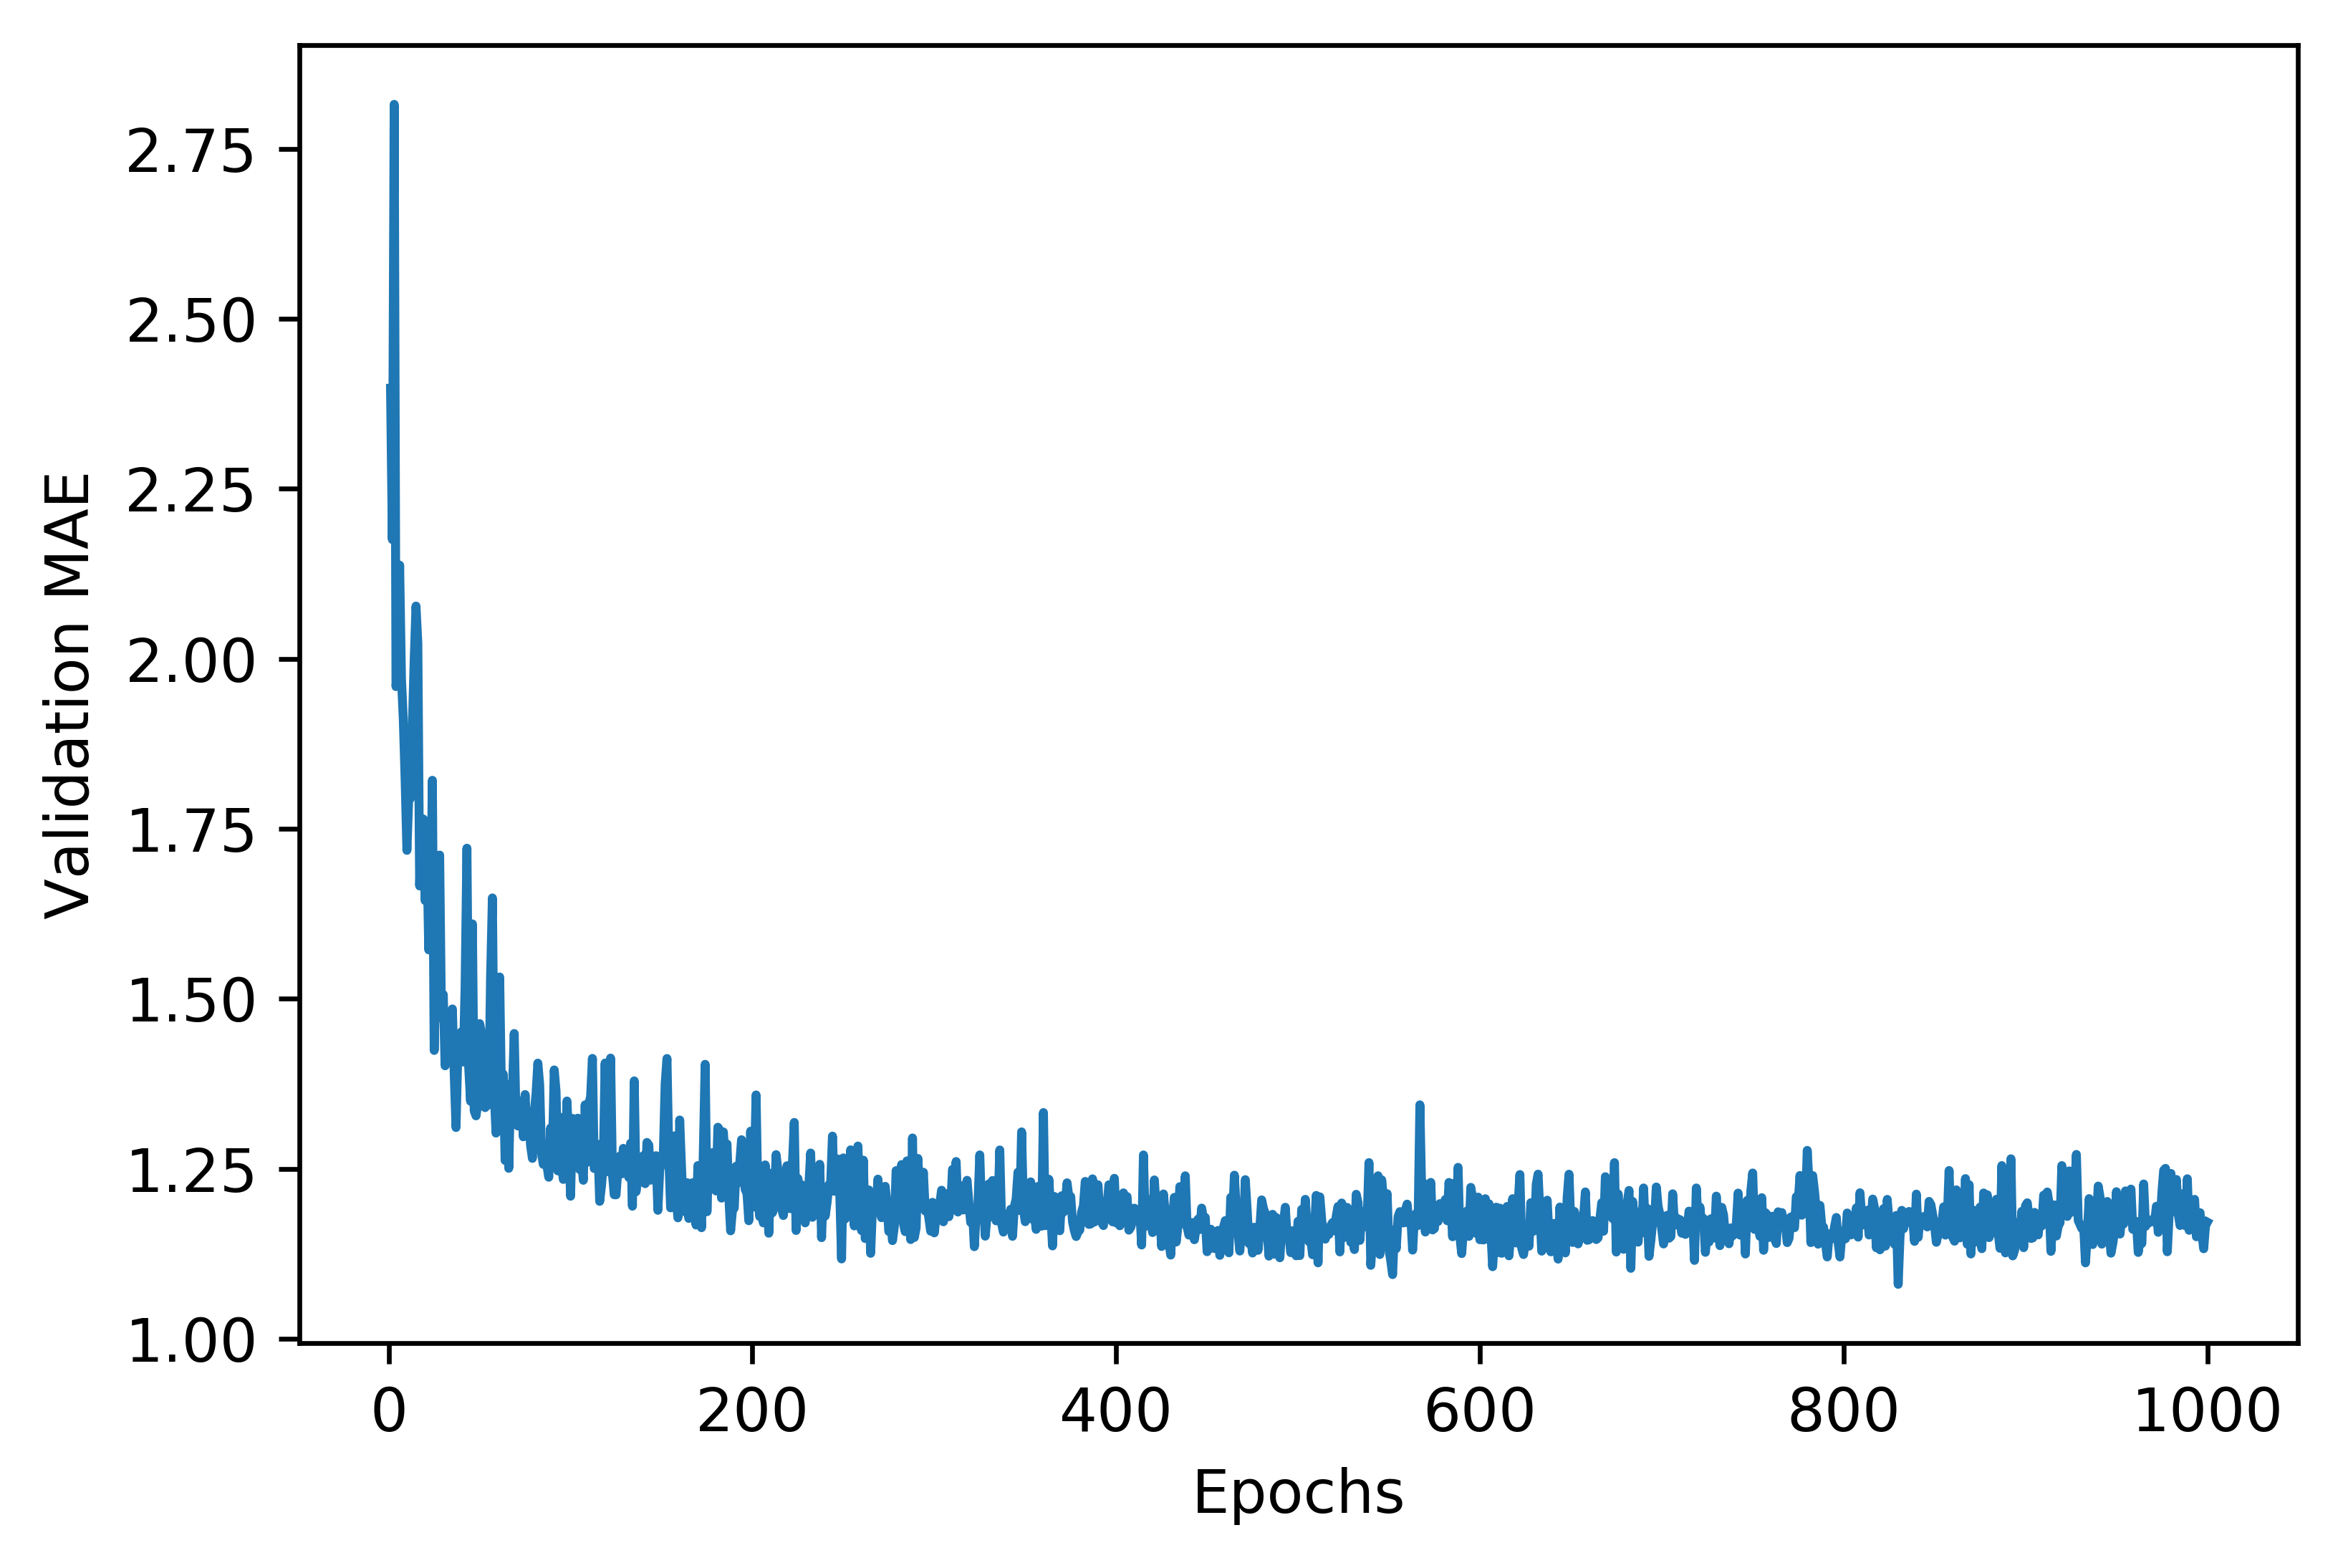

In [53]:
#plotting validation scores
plt.figure(dpi=600)
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [77]:

#model =build_model()
model.fit(x_array,y_array,epochs=1000,batch_size=8,verbose=1, validation_split=0.05)
test_predict = model.predict(test_array)



Train on 380 samples, validate on 20 samples
Epoch 1/1000
380/380 [==============================] - 0s 503us/step - loss: 0.1234 - mean_absolute_error: 0.1414 - val_loss: 1.1669 - val_mean_absolute_error: 0.7353
Epoch 2/1000
380/380 [==============================] - 0s 567us/step - loss: 0.0942 - mean_absolute_error: 0.1177 - val_loss: 0.7745 - val_mean_absolute_error: 0.6162
Epoch 3/1000
380/380 [==============================] - 0s 441us/step - loss: 0.0881 - mean_absolute_error: 0.1344 - val_loss: 0.4611 - val_mean_absolute_error: 0.4624
Epoch 4/1000
380/380 [==============================] - 0s 425us/step - loss: 0.0478 - mean_absolute_error: 0.1189 - val_loss: 0.5170 - val_mean_absolute_error: 0.5227
Epoch 5/1000
380/380 [==============================] - 0s 414us/step - loss: 0.1892 - mean_absolute_error: 0.1344 - val_loss: 0.7162 - val_mean_absolute_error: 0.5562
Epoch 6/1000
380/380 [==============================] - 0s 416us/step - loss: 0.1016 - mean_absolute_error: 0.1286 

380/380 [==============================] - 0s 466us/step - loss: 0.0763 - mean_absolute_error: 0.1276 - val_loss: 0.7529 - val_mean_absolute_error: 0.5949
Epoch 98/1000
380/380 [==============================] - 0s 461us/step - loss: 0.0916 - mean_absolute_error: 0.1287 - val_loss: 0.6410 - val_mean_absolute_error: 0.5650
Epoch 99/1000
380/380 [==============================] - 0s 498us/step - loss: 0.0704 - mean_absolute_error: 0.1274 - val_loss: 0.6392 - val_mean_absolute_error: 0.6005
Epoch 100/1000
380/380 [==============================] - 0s 442us/step - loss: 0.0657 - mean_absolute_error: 0.1257 - val_loss: 0.4519 - val_mean_absolute_error: 0.4787
Epoch 101/1000
380/380 [==============================] - 0s 427us/step - loss: 0.1285 - mean_absolute_error: 0.1420 - val_loss: 1.2213 - val_mean_absolute_error: 0.7325
Epoch 102/1000
380/380 [==============================] - 0s 460us/step - loss: 0.1309 - mean_absolute_error: 0.1218 - val_loss: 0.5475 - val_mean_absolute_error: 0.45

380/380 [==============================] - 0s 399us/step - loss: 0.1275 - mean_absolute_error: 0.1325 - val_loss: 0.7337 - val_mean_absolute_error: 0.6458
Epoch 194/1000
380/380 [==============================] - 0s 385us/step - loss: 0.0571 - mean_absolute_error: 0.1104 - val_loss: 0.7014 - val_mean_absolute_error: 0.6348
Epoch 195/1000
380/380 [==============================] - 0s 386us/step - loss: 0.0923 - mean_absolute_error: 0.1375 - val_loss: 0.5727 - val_mean_absolute_error: 0.5557
Epoch 196/1000
380/380 [==============================] - 0s 392us/step - loss: 0.0736 - mean_absolute_error: 0.1294 - val_loss: 2.0994 - val_mean_absolute_error: 0.8964
Epoch 197/1000
380/380 [==============================] - 0s 389us/step - loss: 0.1080 - mean_absolute_error: 0.1430 - val_loss: 1.1607 - val_mean_absolute_error: 0.6677
Epoch 198/1000
380/380 [==============================] - 0s 557us/step - loss: 0.0943 - mean_absolute_error: 0.1349 - val_loss: 0.7059 - val_mean_absolute_error: 0.

380/380 [==============================] - 0s 385us/step - loss: 0.0924 - mean_absolute_error: 0.1202 - val_loss: 0.7723 - val_mean_absolute_error: 0.5378
Epoch 290/1000
380/380 [==============================] - 0s 392us/step - loss: 0.0645 - mean_absolute_error: 0.1104 - val_loss: 1.1140 - val_mean_absolute_error: 0.6940
Epoch 291/1000
380/380 [==============================] - 0s 413us/step - loss: 0.1003 - mean_absolute_error: 0.1227 - val_loss: 0.8647 - val_mean_absolute_error: 0.6410
Epoch 292/1000
380/380 [==============================] - 0s 395us/step - loss: 0.0617 - mean_absolute_error: 0.1053 - val_loss: 0.6904 - val_mean_absolute_error: 0.4989
Epoch 293/1000
380/380 [==============================] - 0s 386us/step - loss: 0.1277 - mean_absolute_error: 0.1549 - val_loss: 1.4492 - val_mean_absolute_error: 0.7869
Epoch 294/1000
380/380 [==============================] - 0s 386us/step - loss: 0.0388 - mean_absolute_error: 0.1060 - val_loss: 0.8339 - val_mean_absolute_error: 0.

380/380 [==============================] - 0s 377us/step - loss: 0.0818 - mean_absolute_error: 0.1275 - val_loss: 0.8457 - val_mean_absolute_error: 0.6413
Epoch 386/1000
380/380 [==============================] - 0s 380us/step - loss: 0.0782 - mean_absolute_error: 0.1144 - val_loss: 0.6832 - val_mean_absolute_error: 0.5910
Epoch 387/1000
380/380 [==============================] - 0s 380us/step - loss: 0.0472 - mean_absolute_error: 0.1217 - val_loss: 0.6405 - val_mean_absolute_error: 0.5832
Epoch 388/1000
380/380 [==============================] - 0s 444us/step - loss: 0.1536 - mean_absolute_error: 0.1277 - val_loss: 1.2615 - val_mean_absolute_error: 0.6554
Epoch 389/1000
380/380 [==============================] - 0s 402us/step - loss: 0.0486 - mean_absolute_error: 0.1075 - val_loss: 0.9973 - val_mean_absolute_error: 0.6865
Epoch 390/1000
380/380 [==============================] - 0s 392us/step - loss: 0.0524 - mean_absolute_error: 0.1248 - val_loss: 0.6549 - val_mean_absolute_error: 0.

380/380 [==============================] - 0s 392us/step - loss: 0.0590 - mean_absolute_error: 0.1107 - val_loss: 0.9166 - val_mean_absolute_error: 0.6486
Epoch 482/1000
380/380 [==============================] - 0s 387us/step - loss: 0.0284 - mean_absolute_error: 0.1019 - val_loss: 0.4832 - val_mean_absolute_error: 0.4907
Epoch 483/1000
380/380 [==============================] - 0s 386us/step - loss: 0.0973 - mean_absolute_error: 0.1362 - val_loss: 0.7298 - val_mean_absolute_error: 0.6033
Epoch 484/1000
380/380 [==============================] - 0s 382us/step - loss: 0.0729 - mean_absolute_error: 0.1255 - val_loss: 0.6747 - val_mean_absolute_error: 0.5797
Epoch 485/1000
380/380 [==============================] - 0s 375us/step - loss: 0.0525 - mean_absolute_error: 0.1117 - val_loss: 1.2677 - val_mean_absolute_error: 0.7076
Epoch 486/1000
380/380 [==============================] - 0s 380us/step - loss: 0.0704 - mean_absolute_error: 0.1187 - val_loss: 0.8915 - val_mean_absolute_error: 0.

380/380 [==============================] - 0s 400us/step - loss: 0.0238 - mean_absolute_error: 0.0964 - val_loss: 1.6548 - val_mean_absolute_error: 0.7131
Epoch 578/1000
380/380 [==============================] - 0s 389us/step - loss: 0.0632 - mean_absolute_error: 0.1210 - val_loss: 1.1769 - val_mean_absolute_error: 0.6575
Epoch 579/1000
380/380 [==============================] - 0s 389us/step - loss: 0.0726 - mean_absolute_error: 0.1178 - val_loss: 1.1802 - val_mean_absolute_error: 0.6891
Epoch 580/1000
380/380 [==============================] - 0s 405us/step - loss: 0.0773 - mean_absolute_error: 0.1194 - val_loss: 0.7585 - val_mean_absolute_error: 0.5398
Epoch 581/1000
380/380 [==============================] - 0s 390us/step - loss: 0.0500 - mean_absolute_error: 0.1063 - val_loss: 1.4188 - val_mean_absolute_error: 0.7468
Epoch 582/1000
380/380 [==============================] - 0s 414us/step - loss: 0.0541 - mean_absolute_error: 0.1152 - val_loss: 0.7636 - val_mean_absolute_error: 0.

380/380 [==============================] - 0s 376us/step - loss: 0.0748 - mean_absolute_error: 0.1185 - val_loss: 1.8796 - val_mean_absolute_error: 0.8047
Epoch 674/1000
380/380 [==============================] - 0s 389us/step - loss: 0.0386 - mean_absolute_error: 0.1011 - val_loss: 1.1297 - val_mean_absolute_error: 0.6881
Epoch 675/1000
380/380 [==============================] - 0s 380us/step - loss: 0.0481 - mean_absolute_error: 0.1052 - val_loss: 1.9952 - val_mean_absolute_error: 0.8039
Epoch 676/1000
380/380 [==============================] - 0s 409us/step - loss: 0.0602 - mean_absolute_error: 0.1216 - val_loss: 1.4371 - val_mean_absolute_error: 0.7032
Epoch 677/1000
380/380 [==============================] - 0s 387us/step - loss: 0.0984 - mean_absolute_error: 0.1332 - val_loss: 1.4555 - val_mean_absolute_error: 0.7325
Epoch 678/1000
380/380 [==============================] - 0s 411us/step - loss: 0.0279 - mean_absolute_error: 0.0930 - val_loss: 1.5116 - val_mean_absolute_error: 0.

380/380 [==============================] - 0s 386us/step - loss: 0.0516 - mean_absolute_error: 0.1136 - val_loss: 1.4735 - val_mean_absolute_error: 0.6874
Epoch 770/1000
380/380 [==============================] - 0s 378us/step - loss: 0.0449 - mean_absolute_error: 0.1207 - val_loss: 1.8542 - val_mean_absolute_error: 0.6896
Epoch 771/1000
380/380 [==============================] - 0s 382us/step - loss: 0.0589 - mean_absolute_error: 0.1172 - val_loss: 1.9455 - val_mean_absolute_error: 0.8090
Epoch 772/1000
380/380 [==============================] - 0s 379us/step - loss: 0.0762 - mean_absolute_error: 0.1085 - val_loss: 0.8861 - val_mean_absolute_error: 0.6428
Epoch 773/1000
380/380 [==============================] - 0s 386us/step - loss: 0.0286 - mean_absolute_error: 0.1017 - val_loss: 1.6654 - val_mean_absolute_error: 0.7193
Epoch 774/1000
380/380 [==============================] - 0s 405us/step - loss: 0.1449 - mean_absolute_error: 0.1400 - val_loss: 2.2086 - val_mean_absolute_error: 0.

380/380 [==============================] - 0s 395us/step - loss: 0.0964 - mean_absolute_error: 0.1182 - val_loss: 2.4279 - val_mean_absolute_error: 0.8984
Epoch 866/1000
380/380 [==============================] - 0s 385us/step - loss: 0.0521 - mean_absolute_error: 0.1052 - val_loss: 2.1336 - val_mean_absolute_error: 0.8360
Epoch 867/1000
380/380 [==============================] - 0s 383us/step - loss: 0.0511 - mean_absolute_error: 0.1078 - val_loss: 1.5714 - val_mean_absolute_error: 0.7372
Epoch 868/1000
380/380 [==============================] - 0s 389us/step - loss: 0.0750 - mean_absolute_error: 0.1183 - val_loss: 2.3767 - val_mean_absolute_error: 0.8682
Epoch 869/1000
380/380 [==============================] - 0s 396us/step - loss: 0.0427 - mean_absolute_error: 0.1124 - val_loss: 1.8943 - val_mean_absolute_error: 0.8282
Epoch 870/1000
380/380 [==============================] - 0s 395us/step - loss: 0.0611 - mean_absolute_error: 0.1200 - val_loss: 1.9613 - val_mean_absolute_error: 0.

380/380 [==============================] - 0s 378us/step - loss: 0.0794 - mean_absolute_error: 0.1136 - val_loss: 2.1167 - val_mean_absolute_error: 0.8998
Epoch 962/1000
380/380 [==============================] - 0s 399us/step - loss: 0.0679 - mean_absolute_error: 0.1148 - val_loss: 2.2636 - val_mean_absolute_error: 0.9259
Epoch 963/1000
380/380 [==============================] - 0s 418us/step - loss: 0.0479 - mean_absolute_error: 0.1173 - val_loss: 1.3458 - val_mean_absolute_error: 0.7986
Epoch 964/1000
380/380 [==============================] - 0s 409us/step - loss: 0.0422 - mean_absolute_error: 0.1094 - val_loss: 2.2653 - val_mean_absolute_error: 0.8916
Epoch 965/1000
380/380 [==============================] - 0s 383us/step - loss: 0.0655 - mean_absolute_error: 0.1178 - val_loss: 2.8128 - val_mean_absolute_error: 0.9131
Epoch 966/1000
380/380 [==============================] - 0s 418us/step - loss: 0.0817 - mean_absolute_error: 0.1162 - val_loss: 1.8160 - val_mean_absolute_error: 0.

In [78]:
test_predict = np.reshape(test_predict,(1,-1))[0]

In [79]:
test_predict

array([ 1.5976756 ,  7.9153275 ,  0.10300362,  0.59404695,  1.8458863 ,
        4.376636  ,  3.0743752 ,  0.19784296, 14.337671  ,  0.41205943,
       12.626549  ,  6.549729  ,  1.6064936 , 17.294182  ,  1.1881024 ,
        0.87468624,  0.8182778 ,  6.6805243 ,  2.4408538 ,  3.8796453 ,
        0.29693377,  0.57129765, -0.03954232,  0.5954231 ,  1.7505379 ,
        2.472282  ,  2.6813748 ,  1.9785969 ,  4.4182587 ,  2.6062083 ,
       12.6833    ,  1.1476164 ,  0.04874086,  4.4643774 ,  7.8178    ,
        0.66615635,  4.8616076 ,  2.1560485 ,  1.6174464 ,  1.523995  ,
        4.289166  , 12.3699    ,  1.6350288 ,  3.7312236 ,  1.482991  ,
        2.4902413 ,  4.6213136 ,  0.7725461 ,  9.729679  ,  0.8227402 ,
       -0.12200725, 23.739458  ,  0.04770279,  7.6274323 , 14.025961  ,
        0.28723502,  1.6683377 ,  1.5534377 ,  0.56627166,  2.5057144 ,
        2.5641942 ,  7.1383953 ,  0.28169465,  8.603297  ,  4.833884  ,
        5.0135813 ,  1.6766924 ,  0.45787084,  5.8546295 ,  5.72

In [252]:
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(x_array.shape[1],)))#64
#model.add(Dropout(0.2))
model.add(layers.Dense(128,kernel_regularizer=regularizers.l2(0.01),activation='relu'))#64
model.add(layers.Dense(128,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(layers.Dense(1,activation = 'relu'))#1
model.compile(optimizer='adam',loss='mse')

In [638]:
model.fit(x_array,y_array,epochs=10,batch_size=5,verbose=1, validation_split=0.05)


Train on 380 samples, validate on 20 samples
Epoch 1/10
380/380 [==============================] - 0s 698us/step - loss: 0.0374 - val_loss: 1.1609
Epoch 2/10
380/380 [==============================] - 0s 715us/step - loss: 0.0367 - val_loss: 1.2198
Epoch 3/10
380/380 [==============================] - 0s 648us/step - loss: 0.0366 - val_loss: 1.1958
Epoch 4/10
380/380 [==============================] - 0s 692us/step - loss: 0.0363 - val_loss: 1.2779
Epoch 5/10
380/380 [==============================] - 0s 731us/step - loss: 0.0358 - val_loss: 1.2120
Epoch 6/10
380/380 [==============================] - 0s 679us/step - loss: 0.0356 - val_loss: 1.1491
Epoch 7/10
380/380 [==============================] - 0s 659us/step - loss: 0.0379 - val_loss: 1.1731
Epoch 8/10
380/380 [==============================] - 0s 641us/step - loss: 0.0537 - val_loss: 1.4662
Epoch 9/10
380/380 [==============================] - 0s 628us/step - loss: 0.1074 - val_loss: 0.9196
Epoch 10/10
380/380 [================

prediction

In [624]:
test_predict = model.predict(test_array)

In [625]:
test_predict = np.reshape(test_predict,(1,-1))[0]

In [626]:
test_predict

array([ 1.5474324 , 12.154957  ,  0.7902261 ,  3.1696198 ,  2.5212889 ,
       11.035693  ,  4.233888  ,  0.3241027 , 26.79973   ,  0.23092547,
        6.5454497 , 18.65379   ,  1.0136882 , 26.96883   ,  0.36229107,
        0.92547965,  0.65677655,  9.473356  ,  2.9591463 ,  0.6843355 ,
        0.23092547,  0.23092547,  0.26692918,  0.6214886 ,  2.2487533 ,
        4.323121  ,  1.2066898 ,  3.706497  ,  1.893426  ,  6.637315  ,
       21.719452  ,  1.5910239 ,  0.7497028 ,  5.367994  ,  6.9819164 ,
        0.7164191 ,  3.207693  ,  2.50052   ,  1.0402664 ,  1.9920467 ,
        3.824917  , 16.377998  ,  1.5630918 ,  7.4408383 ,  1.062632  ,
        2.9235606 ,  3.648258  ,  0.85730207,  9.654881  ,  0.7806655 ,
        0.23092547, 22.486069  ,  0.23092547, 10.068183  , 10.22583   ,
        0.23092547,  2.301792  ,  0.93313587,  1.1101978 ,  1.1230826 ,
        1.54071   ,  8.146519  ,  0.45132518,  9.450754  ,  3.8618348 ,
        9.871619  ,  1.7667986 ,  1.0584586 ,  9.479174  ,  1.24

In [627]:
for i in range(len(test_predict)):
    if test_predict[i] < 0:
        test_predict[i] = 0
print(test_predict)

[ 1.5474324  12.154957    0.7902261   3.1696198   2.5212889  11.035693
  4.233888    0.3241027  26.79973     0.23092547  6.5454497  18.65379
  1.0136882  26.96883     0.36229107  0.92547965  0.65677655  9.473356
  2.9591463   0.6843355   0.23092547  0.23092547  0.26692918  0.6214886
  2.2487533   4.323121    1.2066898   3.706497    1.893426    6.637315
 21.719452    1.5910239   0.7497028   5.367994    6.9819164   0.7164191
  3.207693    2.50052     1.0402664   1.9920467   3.824917   16.377998
  1.5630918   7.4408383   1.062632    2.9235606   3.648258    0.85730207
  9.654881    0.7806655   0.23092547 22.486069    0.23092547 10.068183
 10.22583     0.23092547  2.301792    0.93313587  1.1101978   1.1230826
  1.54071     8.146519    0.45132518  9.450754    3.8618348   9.871619
  1.7667986   1.0584586   9.479174    1.2455184   0.25076246  0.8343235
  9.216093    0.23092547  6.141425   10.997381    1.5945199   7.9616385
  4.8773847   1.2031696  11.812681    5.399562   12.129453    0.6925201

In [628]:
test_df = DataFrame(test_predict)
test_result = test_df
test_result.insert(0,'id',test_origin['id'])
test_result.columns = ['Id','time']
test_result;
test_result.to_csv("prediction_keras_141_0.60.csv", index = False, sep = ',')